<a href="https://colab.research.google.com/github/sricharitha12/Minor-Project/blob/main/minor_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
!unzip -q "/content/gdrive/My Drive/Data.zip"

In [ ]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
INIT_LR=1e-3
EPOCHS=16
BS=8
dataset="/content/Data"
#dataset=r'F:\MINOR PROJECT K2\Data'

In [ ]:
args={}
args['dataset']=dataset

In [ ]:
import numpy as np
import cv2
import os

iPaths= list(paths.list_images(args["dataset"]))

data=[]
labels=[]

for iPath in iPaths:
  label=iPath.split(os.path.sep)[-2]
  image=cv2.imread(iPath) # converting into array and store in image
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #convert it from bgr to rbg and store it in image
  image=cv2.resize(image,(224,224)) #use image.shape we get (224,224,3)-color, (224,224,1)-grey image
  data.append(image)
  labels.append(label)

data=np.array(data)/255.0 #max vakue of grey scale image-225  (0,255) #when image i.e;data is in numoy array form,labels should also be in numpy array
labels=np.array(labels) #converting into numpy array

In [ ]:
labels

array(['Normal', 'Normal', 'Normal', ..., 'Covid', 'Covid', 'Covid'],
      dtype='<U6')

In [ ]:
import os
Data_Dir="Data//"

In [ ]:
Cimages=os.listdir(Data_Dir+"Covid")
Nimages=os.listdir(Data_Dir+"Normal")

Normal Chest X-Ray Vs Covid-19 Chest X-Ray


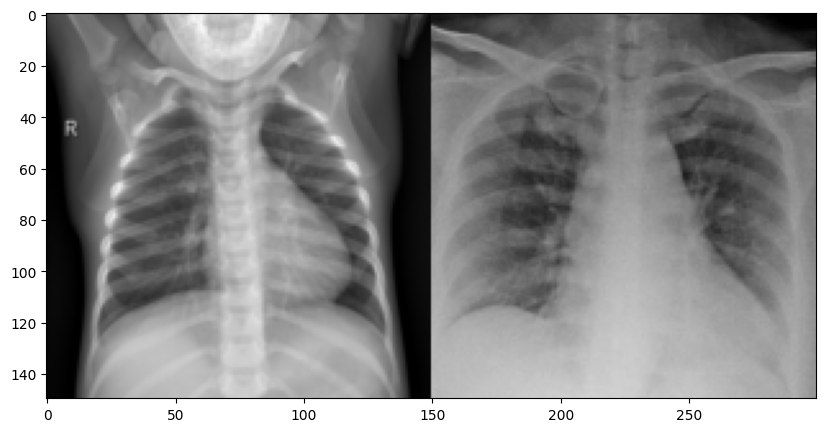

Normal Chest X-Ray Vs Covid-19 Chest X-Ray


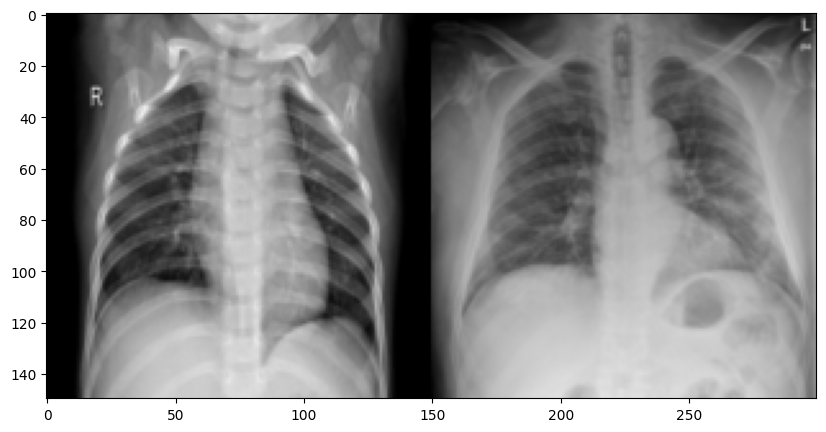

Normal Chest X-Ray Vs Covid-19 Chest X-Ray


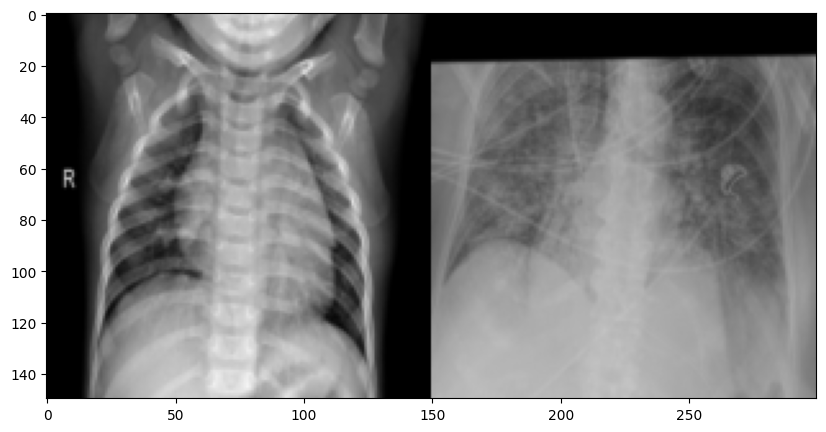

Normal Chest X-Ray Vs Covid-19 Chest X-Ray


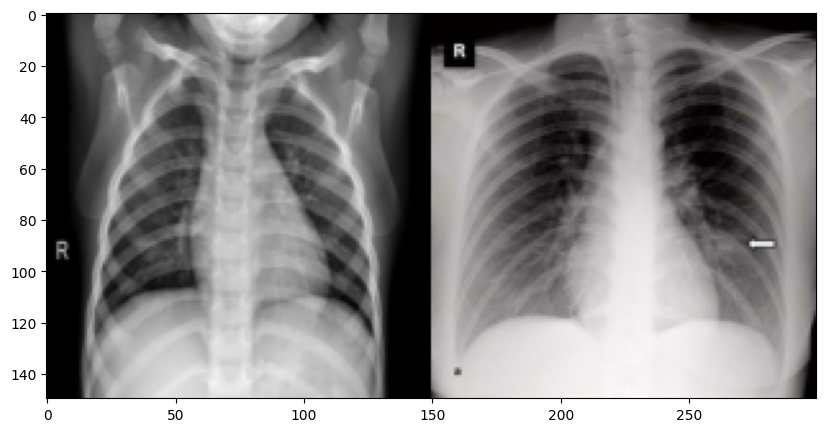

Normal Chest X-Ray Vs Covid-19 Chest X-Ray


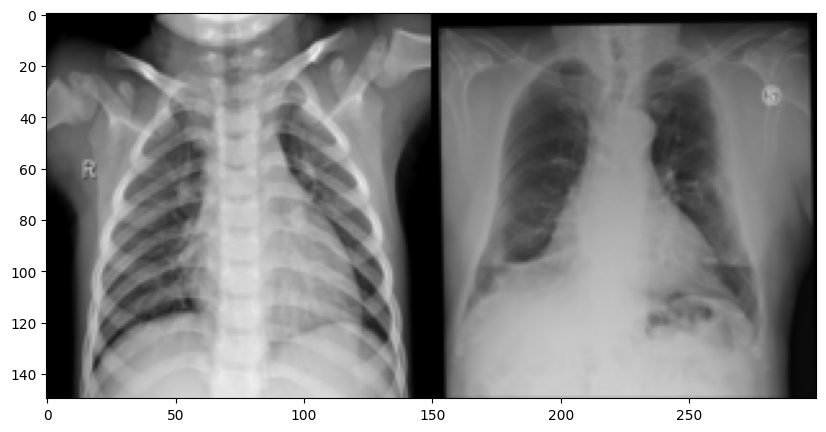

In [ ]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize #skimage doesnot have resize, so importing resize.
import numpy as np

def plotter(i):
  normal=cv2.imread(Data_Dir+"Normal//"+Nimages[i])
  normal=skimage.transform.resize(normal,(150,150,3))
  coronavirus=cv2.imread(Data_Dir+"Covid//"+Cimages[i])
  coronavirus=skimage.transform.resize(coronavirus,(150,150,3),mode='reflect')
  pair=np.concatenate((normal,coronavirus),axis=1)
  print("Normal Chest X-Ray Vs Covid-19 Chest X-Ray")
  plt.figure(figsize=(10,5))
  plt.imshow(pair)
  plt.show()
for i in range(0,5):
  plotter(i)


In [ ]:
LB=LabelBinarizer()
labels=LB.fit_transform(labels)
labels=to_categorical(labels)
print(labels)
(X_train,X_test,Y_train,Y_test)=train_test_split(data,labels,test_size=0.20,random_state=42,stratify=labels)
trainAug=ImageDataGenerator(rotation_range=15,fill_mode="nearest")

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1120, 224, 224, 3), (280, 224, 224, 3), (1120, 2), (280, 2))

In [ ]:
bModel=VGG16(weights="imagenet",include_top=False,input_tensor=Input(shape=(224,224,3)))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
bModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
hModel=bModel.output
hModel=AveragePooling2D(pool_size=(4,4))(hModel)
hModel=Flatten(name="flatten")(hModel)
hModel=Dense(64,activation="relu")(hModel)
hModel=Dropout(0.5)(hModel)
hModel=Dense(2,activation="softmax")(hModel)
model=Model(inputs=bModel.input,outputs=hModel)
for layer in bModel.layers:
  layer.trainable=False

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


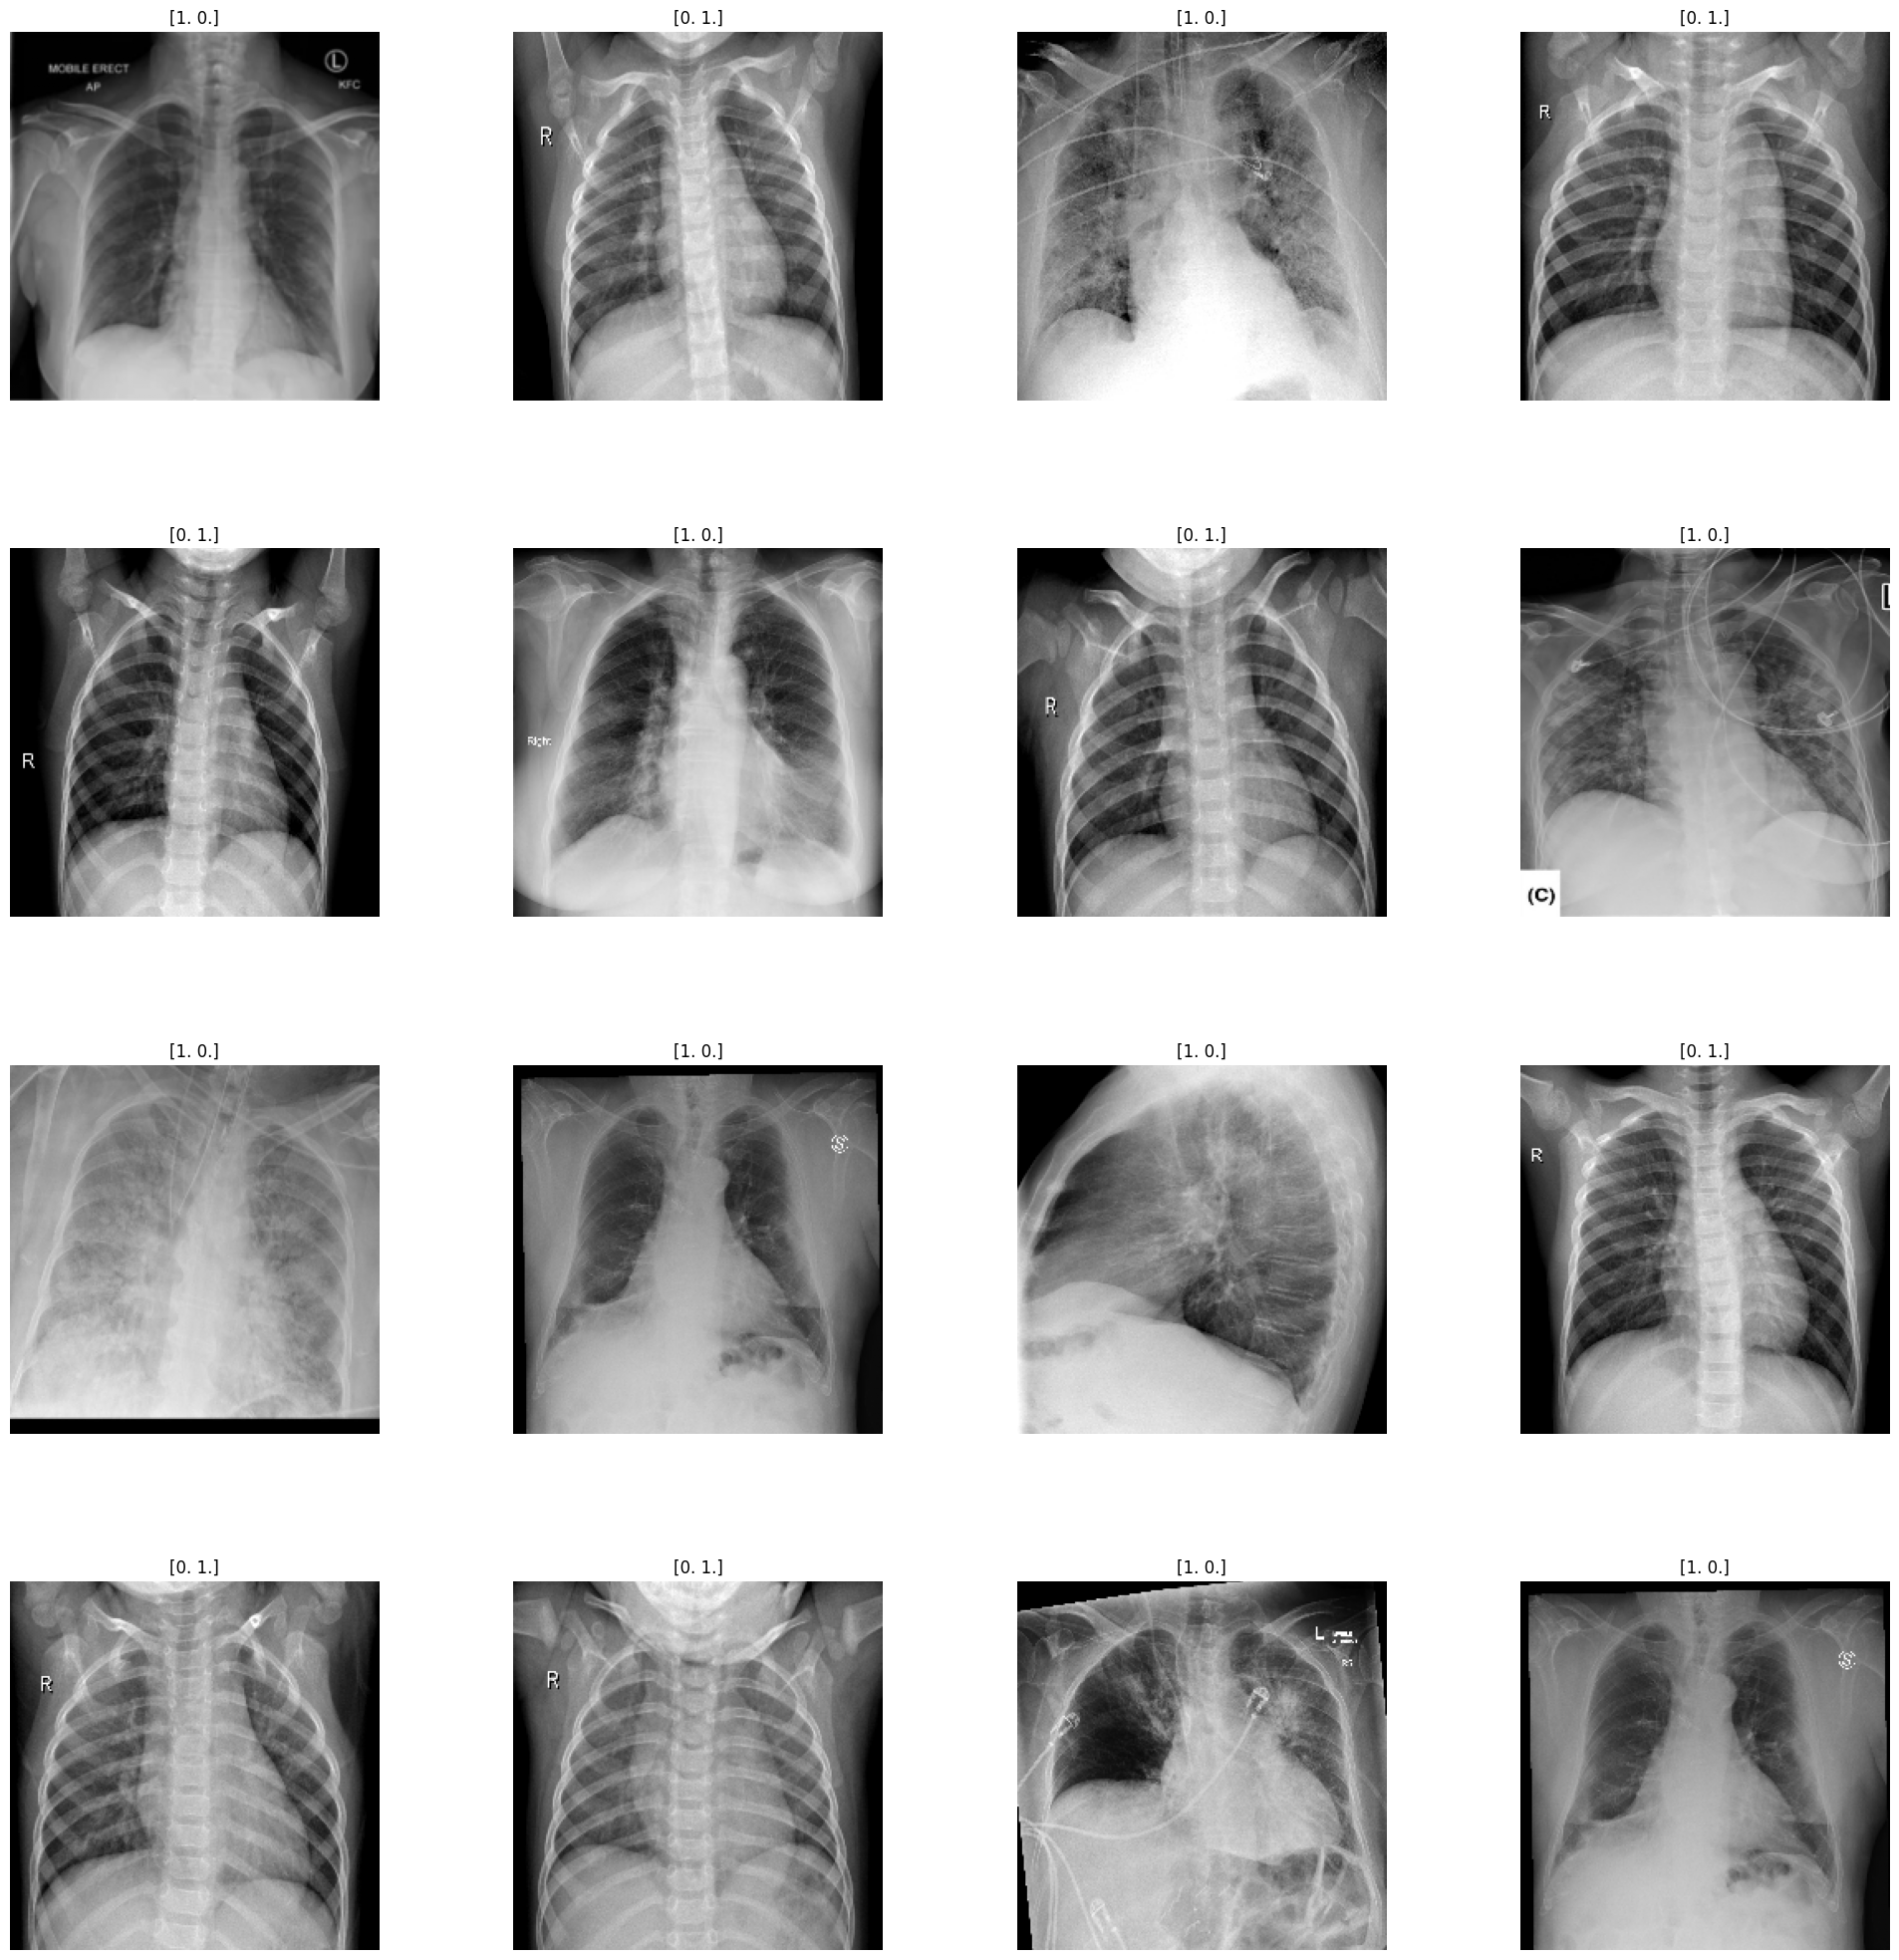

In [ ]:
W_grid=4
L_grid=4
fig,axes=plt.subplots(L_grid,W_grid,figsize=(25,25))
axes=axes.ravel()
n_training=len(X_train)
for i in np.arange(0,L_grid*W_grid):
  index=np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(Y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
import tensorflow as tf

opt=tf.keras.optimizers.legacy.Adam(learning_rate=INIT_LR,decay=INIT_LR/EPOCHS)
model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
print("Compiling starts")
R=model.fit_generator(trainAug.flow(X_train,Y_train,batch_size=BS))

Compiling starts


<ipython-input-30-52f6df3e4f93>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  R=model.fit_generator(trainAug.flow(X_train,Y_train,batch_size=BS))


140/140 [==============================] - 774s 6s/step - loss: 0.4361 - accuracy: 0.8455


35/35 [==============================] - 187s 5s/step


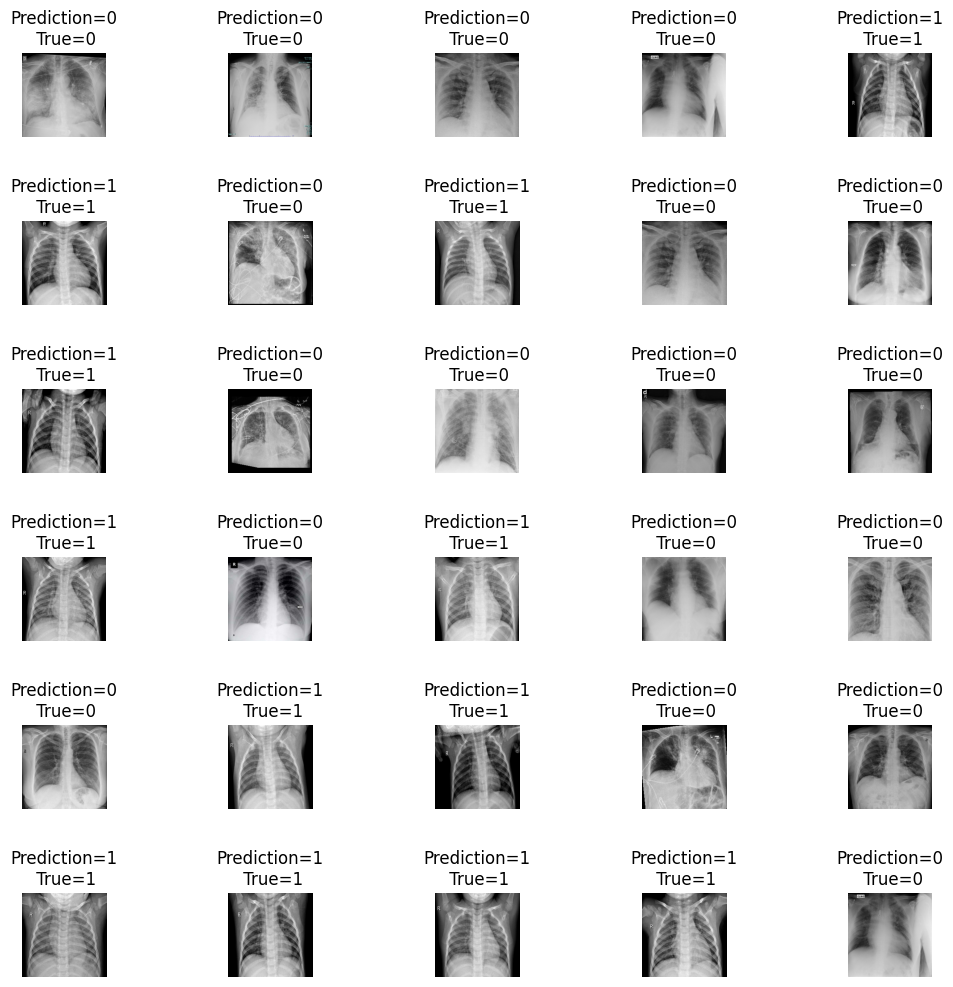

In [ ]:
L=6
W=5
fig,axes=plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()
y_pred=model.predict(X_test,batch_size=BS)
for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction={}\n True={}'.format(y_pred.argmax(axis=1)[i],Y_test.argmax(axis=1)[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=1,hspace=1)

In [ ]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test,batch_size=BS)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(Y_test.argmax(axis=1),y_pred,target_names=LB.classes_))

35/35 [==============================] - 182s 5s/step
              precision    recall  f1-score   support

       Covid       0.99      1.00      0.99       160
      Normal       1.00      0.98      0.99       120

    accuracy                           0.99       280
   macro avg       0.99      0.99      0.99       280
weighted avg       0.99      0.99      0.99       280



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test.argmax(axis=1),y_pred)
total=sum(sum(cm))
acc=(cm[0,0]+cm[1,1])/total
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[160   0]
 [  2 118]]
acc: 0.9929
sensitivity: 1.0000
specificity: 0.9833


KeyError: ignored

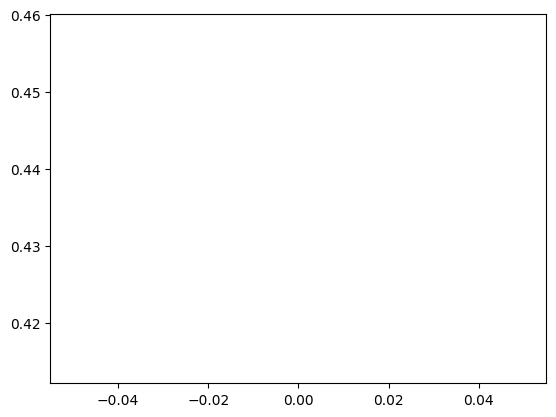

In [ ]:
from imutils import paths
import matplotlib.pyplot as plt

plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('Validation_loss')  # Saving the plot before showing it
plt.show()

plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('Validation_accuracy')
plt.show()


In [ ]:
model.save(r'F:\MINOR PROJECT K2\model.h5')

In [ ]:
model.save("content/gdrive/MY Drive/model.h5")

In [ ]:
import tensorflow as tf
from keras.models import load_model
model.save('Covid_model.h5')

In [ ]:
import tensorflow as tf
model=tf.keras.models.load_model('Covid_model.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

1/1 [==============================] - 1s 757ms/step
Prediction: Corona


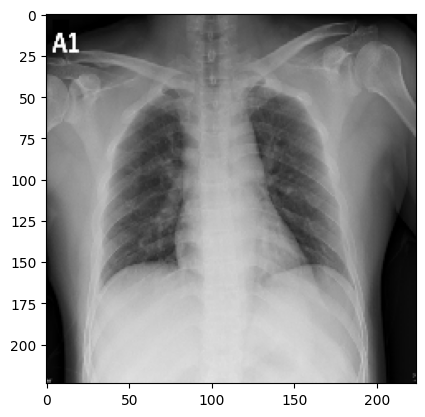

In [ ]:
#from keras.preprocessing import image
import keras.utils as image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
img=image.load_img('Data/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png',target_size=(224,224))
imgplot=plt.imshow(img)
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
New_pred=np.argmax(classes,axis=1)
if New_pred==[1]:
  print('Prediction: Normal')
else:
  print("Prediction: Corona")

1/1 [==============================] - 1s 569ms/step
Prediction: Normal


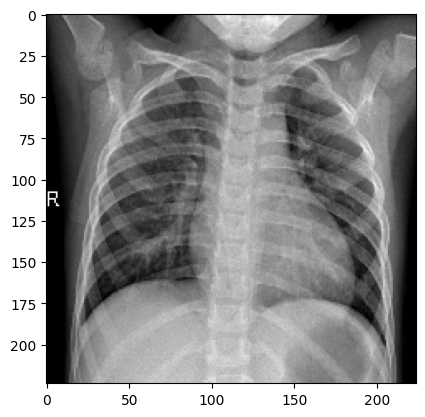

In [ ]:
#from keras.preprocessing import image
import keras.utils as image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
img=image.load_img('Data/Normal/IM-0162-0001.jpeg',target_size=(224,224))
imgplot=plt.imshow(img)
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
New_pred=np.argmax(classes,axis=1)
if New_pred==[1]:
  print("Prediction: Normal")
else:
  print("Prediction: Corona")